# ANALIZA 500 NAJVREDNEJŠIH PODJETIJ NA TRGU

## Opis in priprava


Predstavil bom podatke, pridobjene tekom dela projektne naloge.

Najprej je potrebno uvoziti določene knjižnjice in pa podatke iz drugih datotek, da bo program lahko narisal grafe.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urejanje import porazdelitev_sektorjev, porazdelitev_držav, vrednost_države, povprečna_vrednost_sektorja, vrednosti_sektorjev, porazdelitev_industrij
from urejanje import podjetja

Uvozil bom tudi csv v katerem so vsi podatki, da se vidi, kako so urejeni.

In [5]:
podatki = pd.read_csv("podatkiPodjetja.csv")

podatki

,ime,država,kratica,vrednost,sektor,industrija
0,Apple,ZDA,AAPL,2958.00,Tehnologija,Potrošniška elektronika
1,Microsoft,ZDA,MSFT,2537.00,Tehnologija,Programska oprema
2,Aramco,Savdska Arabija,2222,2074.00,Energetika,Nafta in plin
3,Alphabet,ZDA,GOOG,1521.00,Komunikacijske storitve,Internetne vsebine in informacije
4,Amazon,ZDA,AMZN,1321.00,Potrošniške storitve,Internetna maloprodaja
...,...,...,...,...,...,...
495,"Ameriprise Financial, Inc",ZDA,AMP,35.02,Finance,Upravljanje sredstev
496,"Agilent Technologies, Inc",ZDA,A,35.01,Zdravstvo,Diagnostika in raziskave
497,HP Inc,ZDA,HPQ,34.99,Tehnologija,Računalniška strojna oprema
498,Newmont Corporation,ZDA,NEM,34.99,Osnovni materiali,Zlato


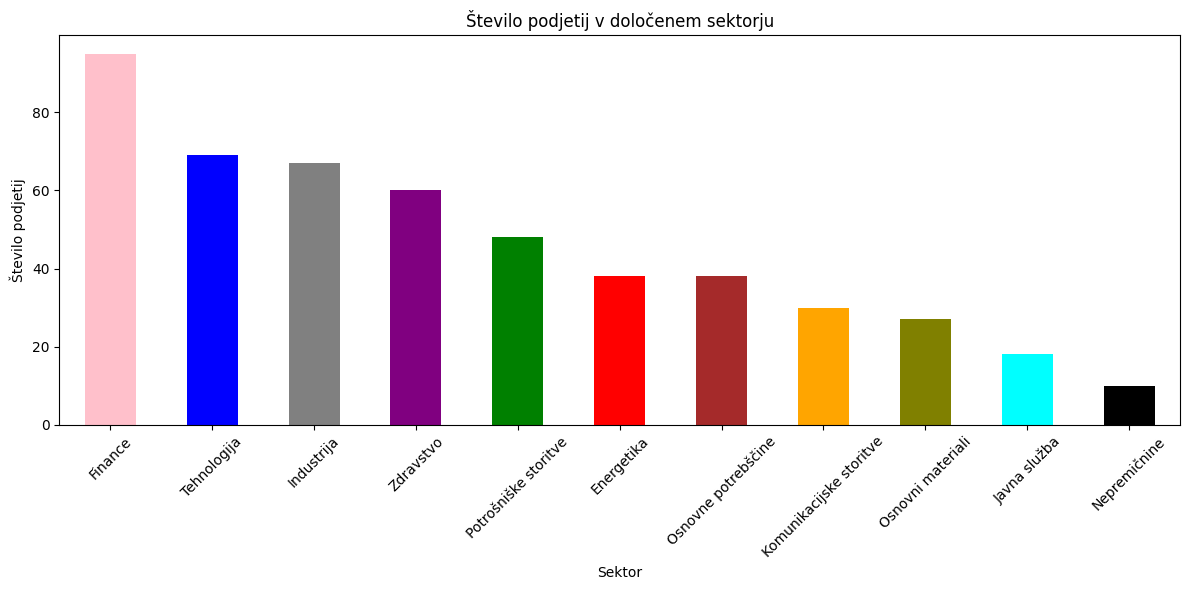

In [6]:


plt.figure(figsize=(12, 6))
porazdelitev_sektorjev.plot(kind='bar', color=["pink", "blue", "grey", "purple", "green", "red", "brown", "orange", "olive", "cyan", "black"])
plt.title("Število podjetij v določenem sektorju")
plt.xlabel("Sektor")
plt.ylabel("Število podjetij")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Prikaz deleža top 500 podjetij, za vsako državo

Dodam tabelo s podatki o številu podjetij iz vsake države.

In [7]:
podatki = pd.read_csv("porazdelitev_držav.csv")

podatki

,država,count
0,ZDA,256
1,Kitajska,33
2,Japonska,30
3,Združeno kraljestvo,22
4,Francija,20
...,...,...
27,Avstrija,1
28,Argentina,1
29,Bermuda,1
30,Južna Afrika,1



Pričakoval sem, da bodo Američani prevladovali, a ne za toliko. Dejstvo, da je več kot polovica podjetij iz ZDA, kaže na to, da so v ZDA tako kot v preteklosti, tudi trenutno najboljši pogoji za uspešno poslovanje velikih podjetij. Tukaj je graf ki prikazuje stanje.

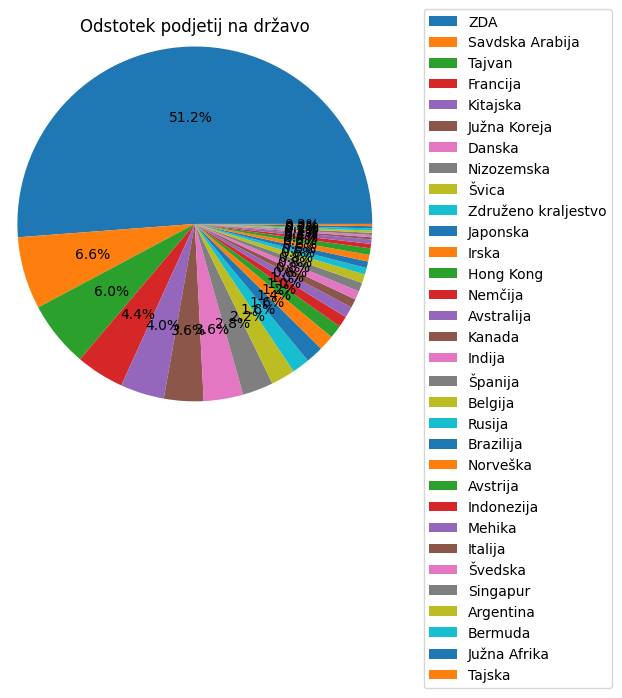

In [8]:
plt.pie(porazdelitev_držav, radius=1.2, autopct="%0.1f%%")
plt.title("Odstotek podjetij na državo")
plt.legend(labels=podjetja.država.unique(), loc='upper left', bbox_to_anchor=(1.1, 1.1))
plt.show()

Dodal bom tudi graf, ki prikazuje skupno vrednost podjetij vsake države. Zaradi boljše preglednosti sem se omejil samo na 10 držav z največjo vrednostjo.
Kot vidimo ZDA v skupni vrednosti podjetij ZDA prednjačijo še bolj kot v prejšnjem grafu, kar znova potrjuje njihov primat v svetu.

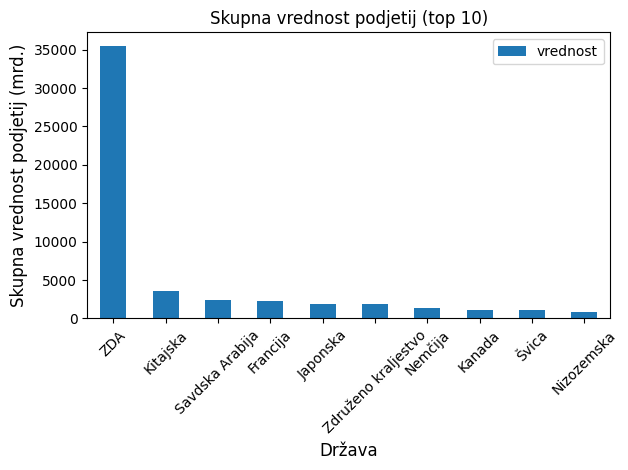

In [9]:
vrednost_države = vrednost_države[:10]
ax = vrednost_države.plot(kind='bar')
ax.set_xlabel('Država', fontsize=12)
ax.set_ylabel('Skupna vrednost podjetij (mrd.)', fontsize=12)
plt.title("Skupna vrednost podjetij (top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()